In [5]:
!pip install --user pmdarima

  Using cached https://files.pythonhosted.org/packages/d3/b8/0295767de22ac446faa0fa596e06112eedb498f897682dd338fb4bf035c2/pmdarima-1.8.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/16/33/e0b09b2810e355b667cd3b28850c36963735a77a431efdb2c2ca1c1c5cea/scikit_learn-0.24.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/6c/c2/af416a82fd7f051a5a0eae3abeb0a098baa774c306631a5762b1e011d279/statsmodels-0.12.2-cp37-none-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/06/c8/78d94bf4d039fd1ef878363491f2925e29b7ccfafa3dcd9dddfaeb0f4608/scipy-1.6.1-cp37-cp37m-win_amd64.whl


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import io
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
from pmdarima import auto_arima


In [134]:
df=pd.read_csv('Bprd',index=True)

,D,set,DD,GD,B
T,,,,,
2008-02-03,33.0,training,23.0,203.869711,0
2008-02-03,33.0,training,23.0,203.869711,0
2008-02-03,33.0,test,23.0,237.752661,0
2008-02-03,33.0,test,23.0,175.314130,0
2008-02-03,33.0,training,23.0,203.869711,0
...,...,...,...,...,...
2010-10-20,292.0,training,282.0,3634.256807,16
2010-10-27,299.0,training,289.0,4420.913697,15
2010-10-27,299.0,test,289.0,4683.272049,16


In [136]:
train = df[df['set']=='training']
test = df[df['set']=='test']


In [143]:
model = SARIMAX(train['B'],order =(0,1,1),exog=train[['DD','GD']])
fit_res = model.fit(disp=False)

res = model.filter(fit_res.params)
meme = fit_res.predict(start = '2008-02-03' ,end='2010-10-27', exog=test[['DD','GD']])

predict_dy = res.get_prediction(dynamic=273,exog=test[['DD','GD']])
predict_dy_ci = predict_dy.conf_int()

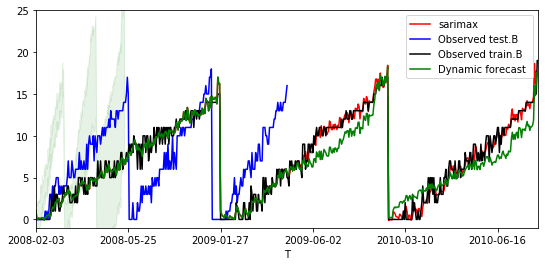

In [148]:
# Graph
fig, ax = plt.subplots(figsize=(9,4))

meme.plot(style='r',label='sarimax')

# Plot data points
test.loc['2008-02-03':, 'B'].plot(ax=ax, style='b', label='Observed test.B')
train.loc['2008-02-03':, 'B'].plot(ax=ax, style='black', label='Observed train.B')
# Plot predictions
predict_dy.predicted_mean.loc['2008-02-03':].plot(ax=ax, style='g', label='Dynamic forecast ')
ci = predict_dy_ci.loc['2008-02-03':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)  
axes = plt.gca()
axes.set_ylim([-1,25])
ax.legend(loc='upper right')


In [149]:
print('Dynamic error : ', np.sqrt(mean_squared_error(test.B, predict_dy.predicted_mean[:273])))
print('sarimax error : ',np.sqrt(mean_squared_error(test.B, meme[:273])))

Dynamic error :  5.386598601577411
sarimax error :  5.386598601577411


In [155]:
print('Dynamic error : ', np.sqrt(mean_squared_error(train.B, predict_dy.predicted_mean)))
print('sarimax error : ',np.sqrt(mean_squared_error(train.B[:543], meme)))

Dynamic error :  1.486766126124678
sarimax error :  0.84851162911232
